# Name: Soumik Karmakar
## The Sparks Foundation: Graduation Rotational Internship Program - March,2021
### Data Science and Business Analytics Intern
### Task 2 - Prediction using Unupervised ML
### Probem: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
#### Importing required liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

#### Imporing the Iris Dataset

In [2]:
try:
    iris_df = pd.read_csv("Iris.csv")
    iris_df.drop('Id',inplace=True,axis = 1)
except IOError:
    # This will only check for an IOError exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Data imported successfully.")

iris_df.head(5)

Data imported successfully.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.shape

(150, 5)

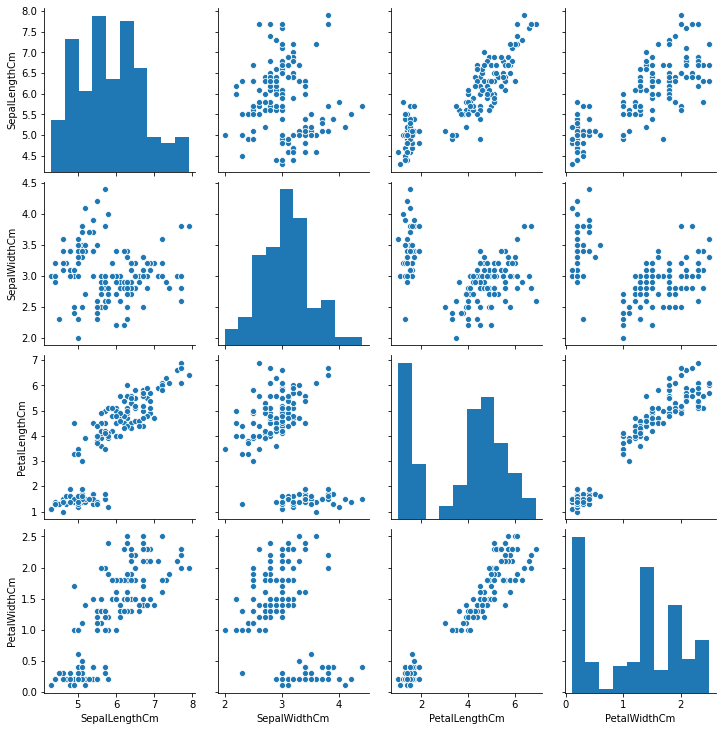

In [5]:
sns.pairplot(iris_df)

In [6]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


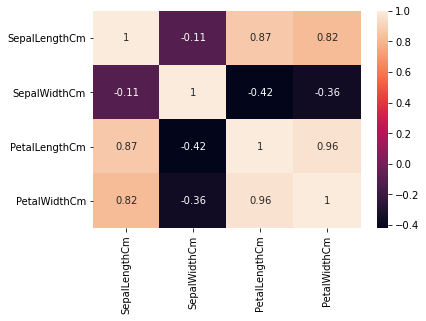

In [7]:
sns.heatmap(iris_df.corr(),annot = True)

#### Finding the optimum number of clusters for k-means classification

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### Now we plot the results onto a line graph, allowing us to observe 'The elbow'

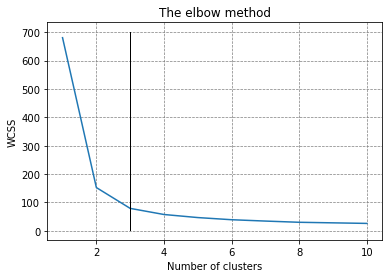

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
plt.plot([3, 3], [700, 3], 'k', lw=1)
plt.show()

"An elbow" is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. We can clearly  from the above graph the occurence of 'The elbow'. The optimum number of clusters is where the elbow occurs.

From this we choose the number of clusters = 3.

#### Applying kmeans to the dataset / Creating the kmeans classifier

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

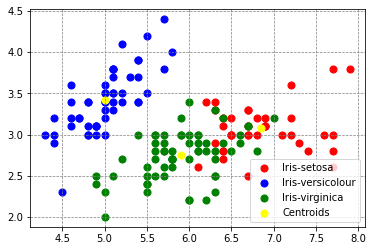

In [11]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
plt.legend()
#plt.figure(figsize = (100,70))

##### Hence we get the required k-means clusters.

## Thank You!!